In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 751k/751k [00:00<00:00, 1.35MB/s]

Extracting files...
Path to dataset files: C:\Users\Alex\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
#df = pd.read_csv('/kaggle/input/loan-approval-classification-data/loan_data.csv')

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.isna().any()

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
loan_status                       False
dtype: bool

In [8]:
df[df.isna().any(axis=1)]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


No missing values

In [9]:
df.person_gender.value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [10]:
df.person_education.value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [11]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [12]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [13]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [7]:
df_encoded = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], drop_first=True)

## There I used one-hot encoding to be able to work with categorical values

# Now, let's do EDA

In [15]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


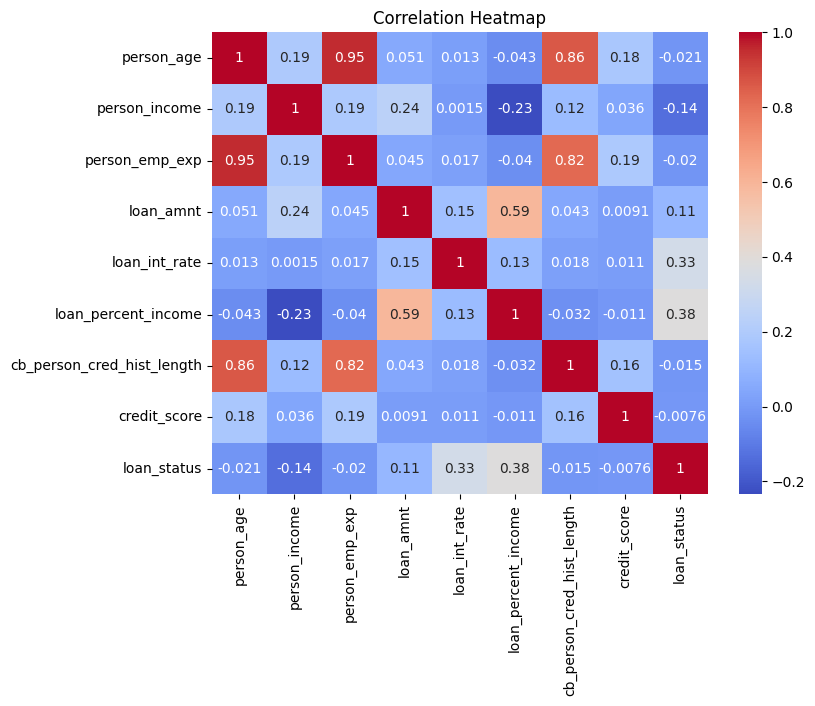

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
def count_plot(df, col='None'):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45, ha='right')
    plt.show()

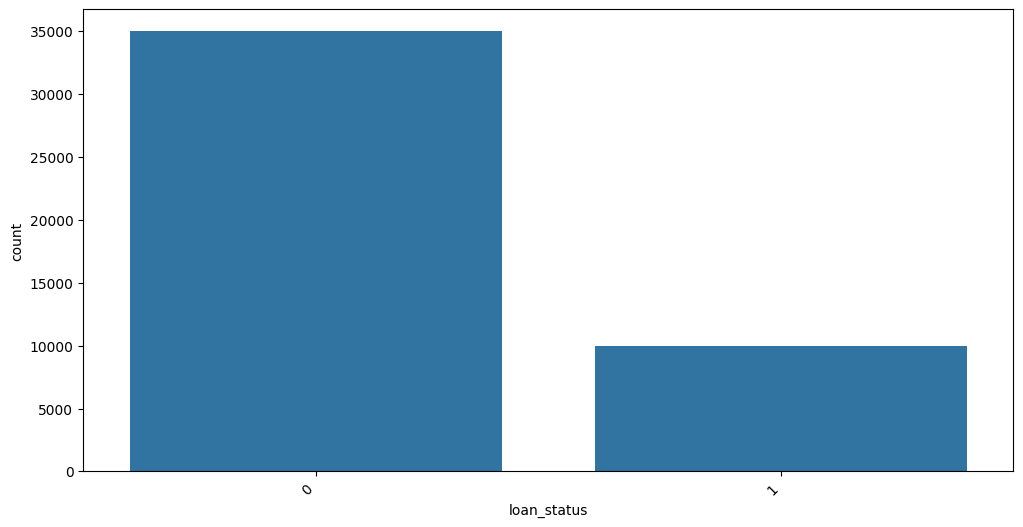

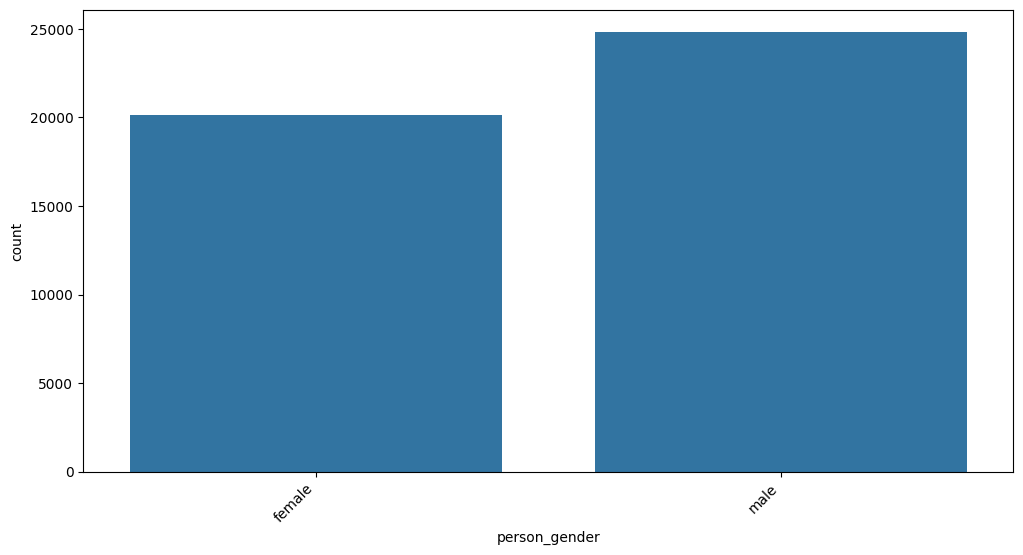

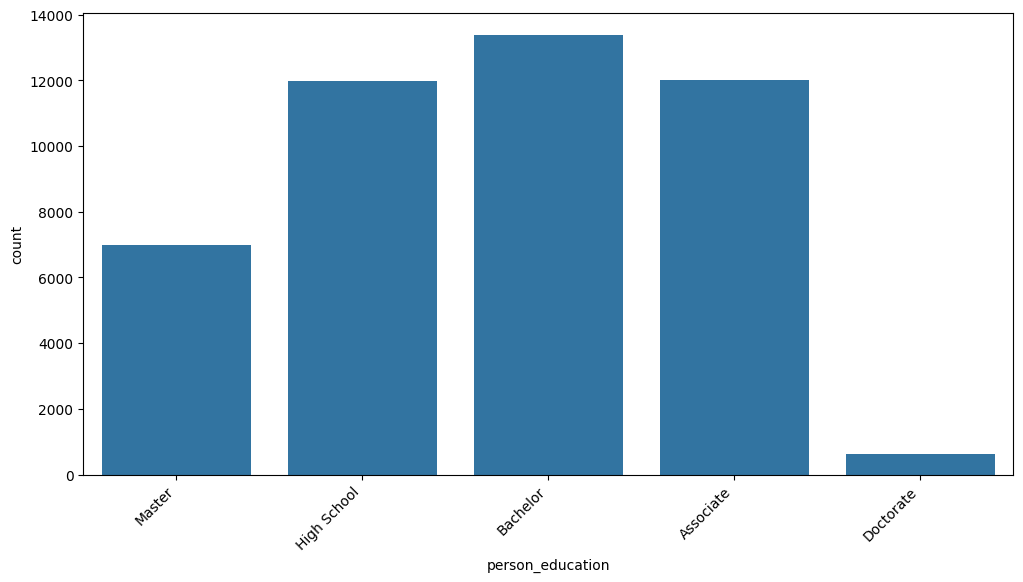

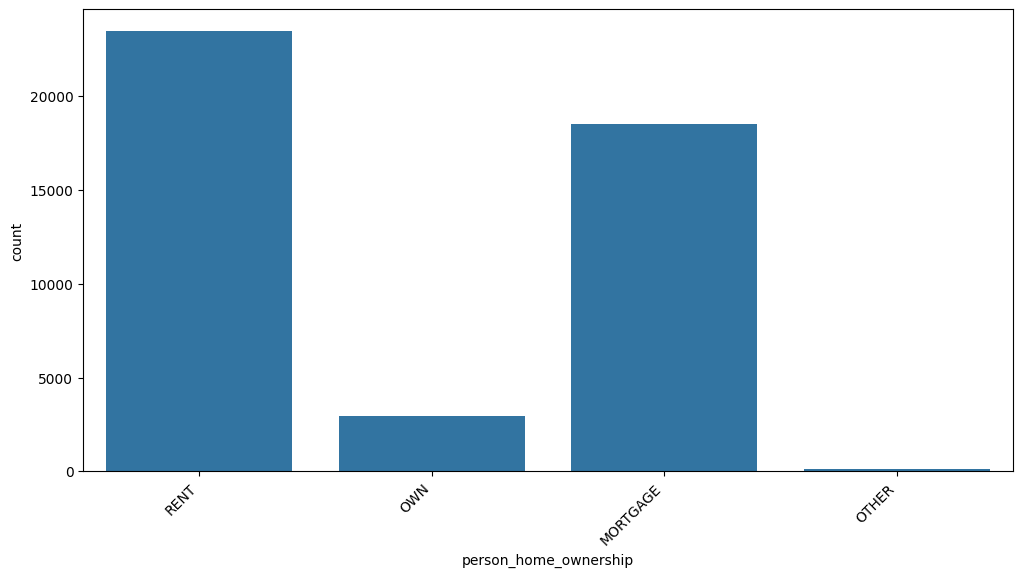

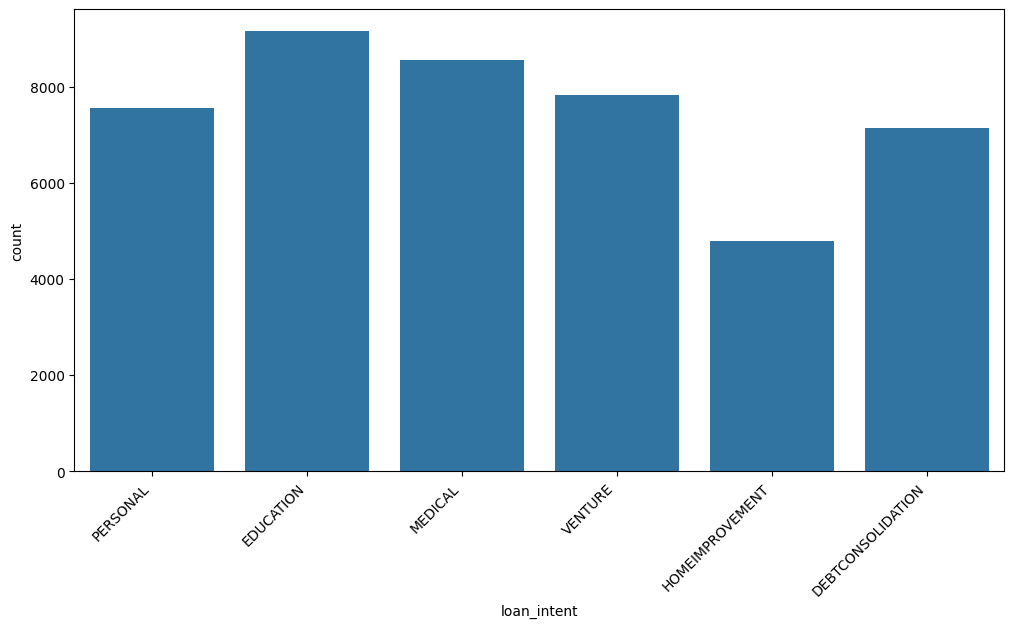

In [18]:
for i in ['loan_status', 'person_gender', 'person_education', 'person_home_ownership', 'loan_intent']:
    count_plot(df, i)

### Target is not balanced, but other features quite are, except person's house ownership

In [19]:
def plot_hist(df, col):
    plt.title(col)
    plt.hist(df[col])
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=3)
    plt.axvline(df[col].mean() - df[col].std(), color='y', linestyle='dashed', linewidth=3)
    plt.axvline(df[col].mean() + df[col].std(), color='y', linestyle='dashed', linewidth=3)
    plt.show()

In [20]:
df.select_dtypes(include=['number']).columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

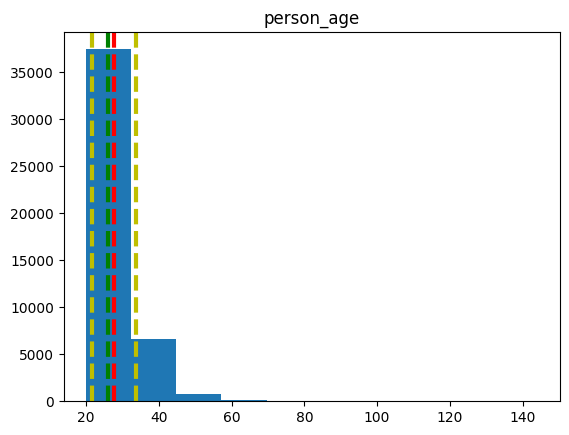

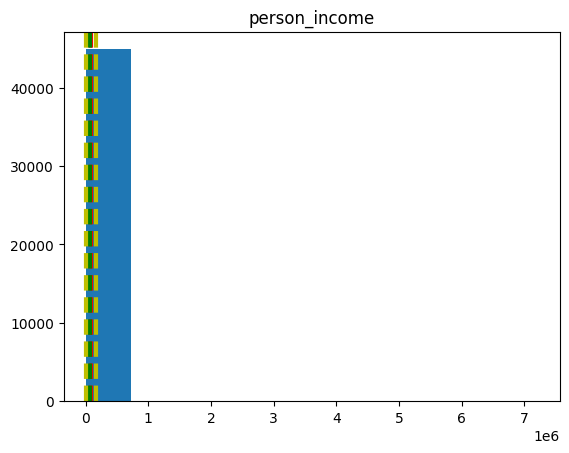

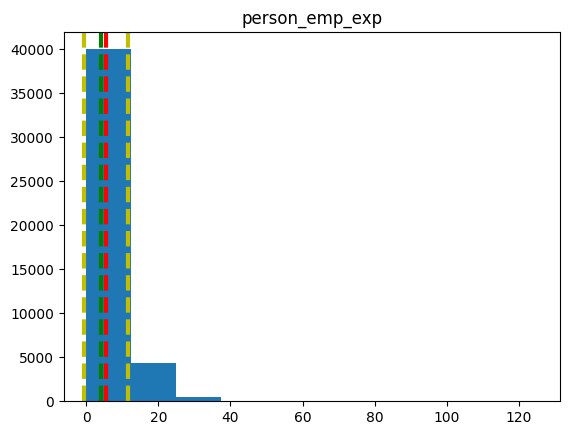

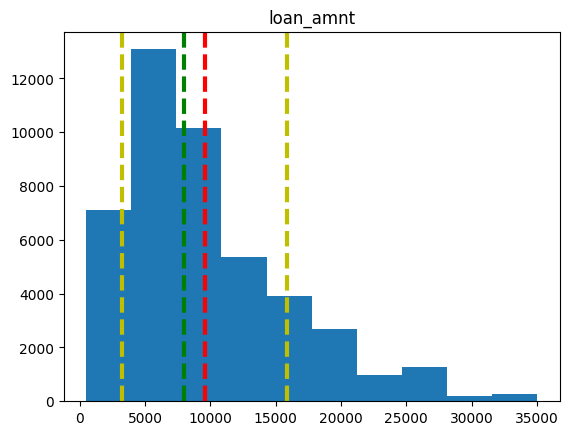

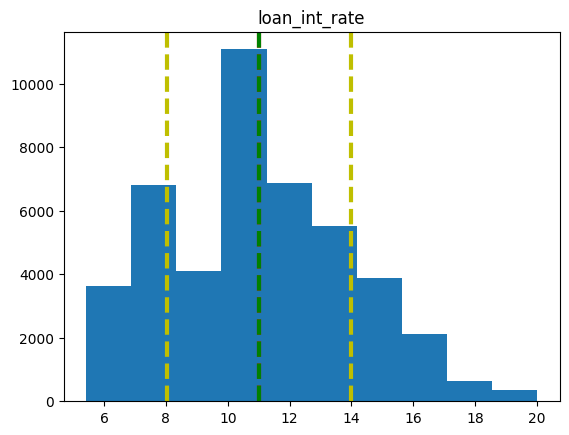

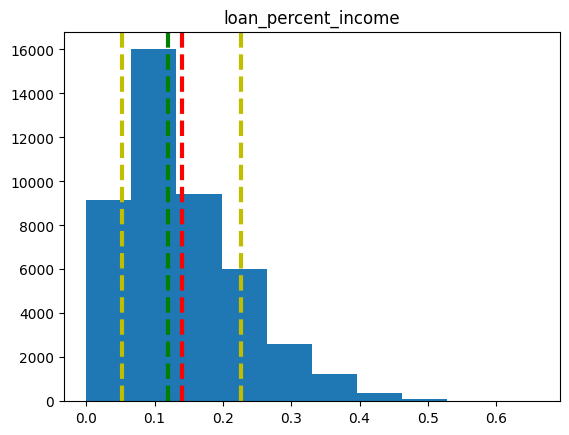

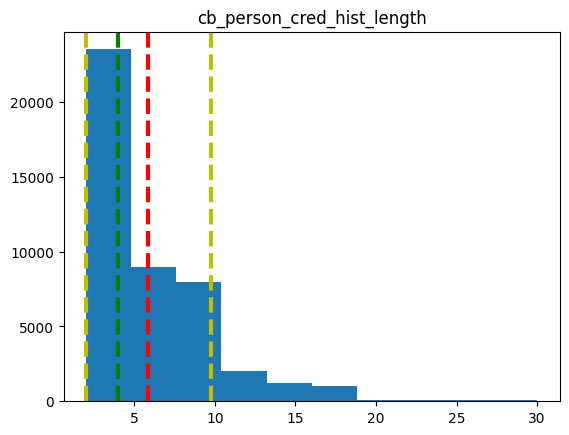

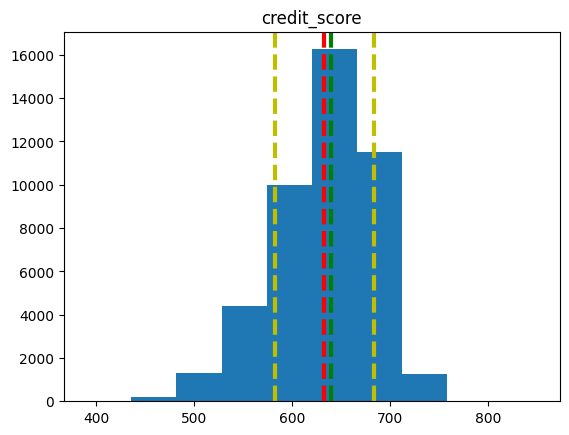

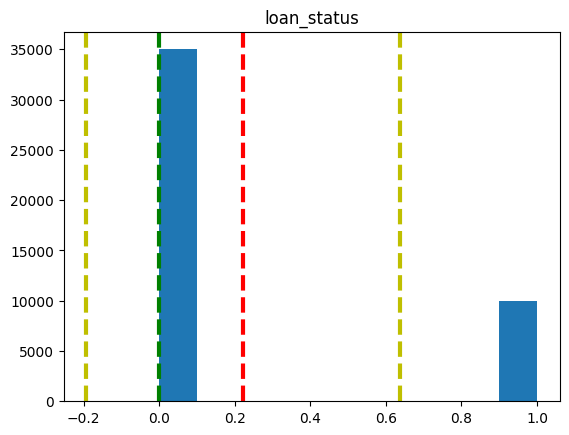

In [21]:
for i in df.select_dtypes(include=['number']):
    plot_hist(df, i)

### I see here binomial and nearly normal distributions

In [22]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [23]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


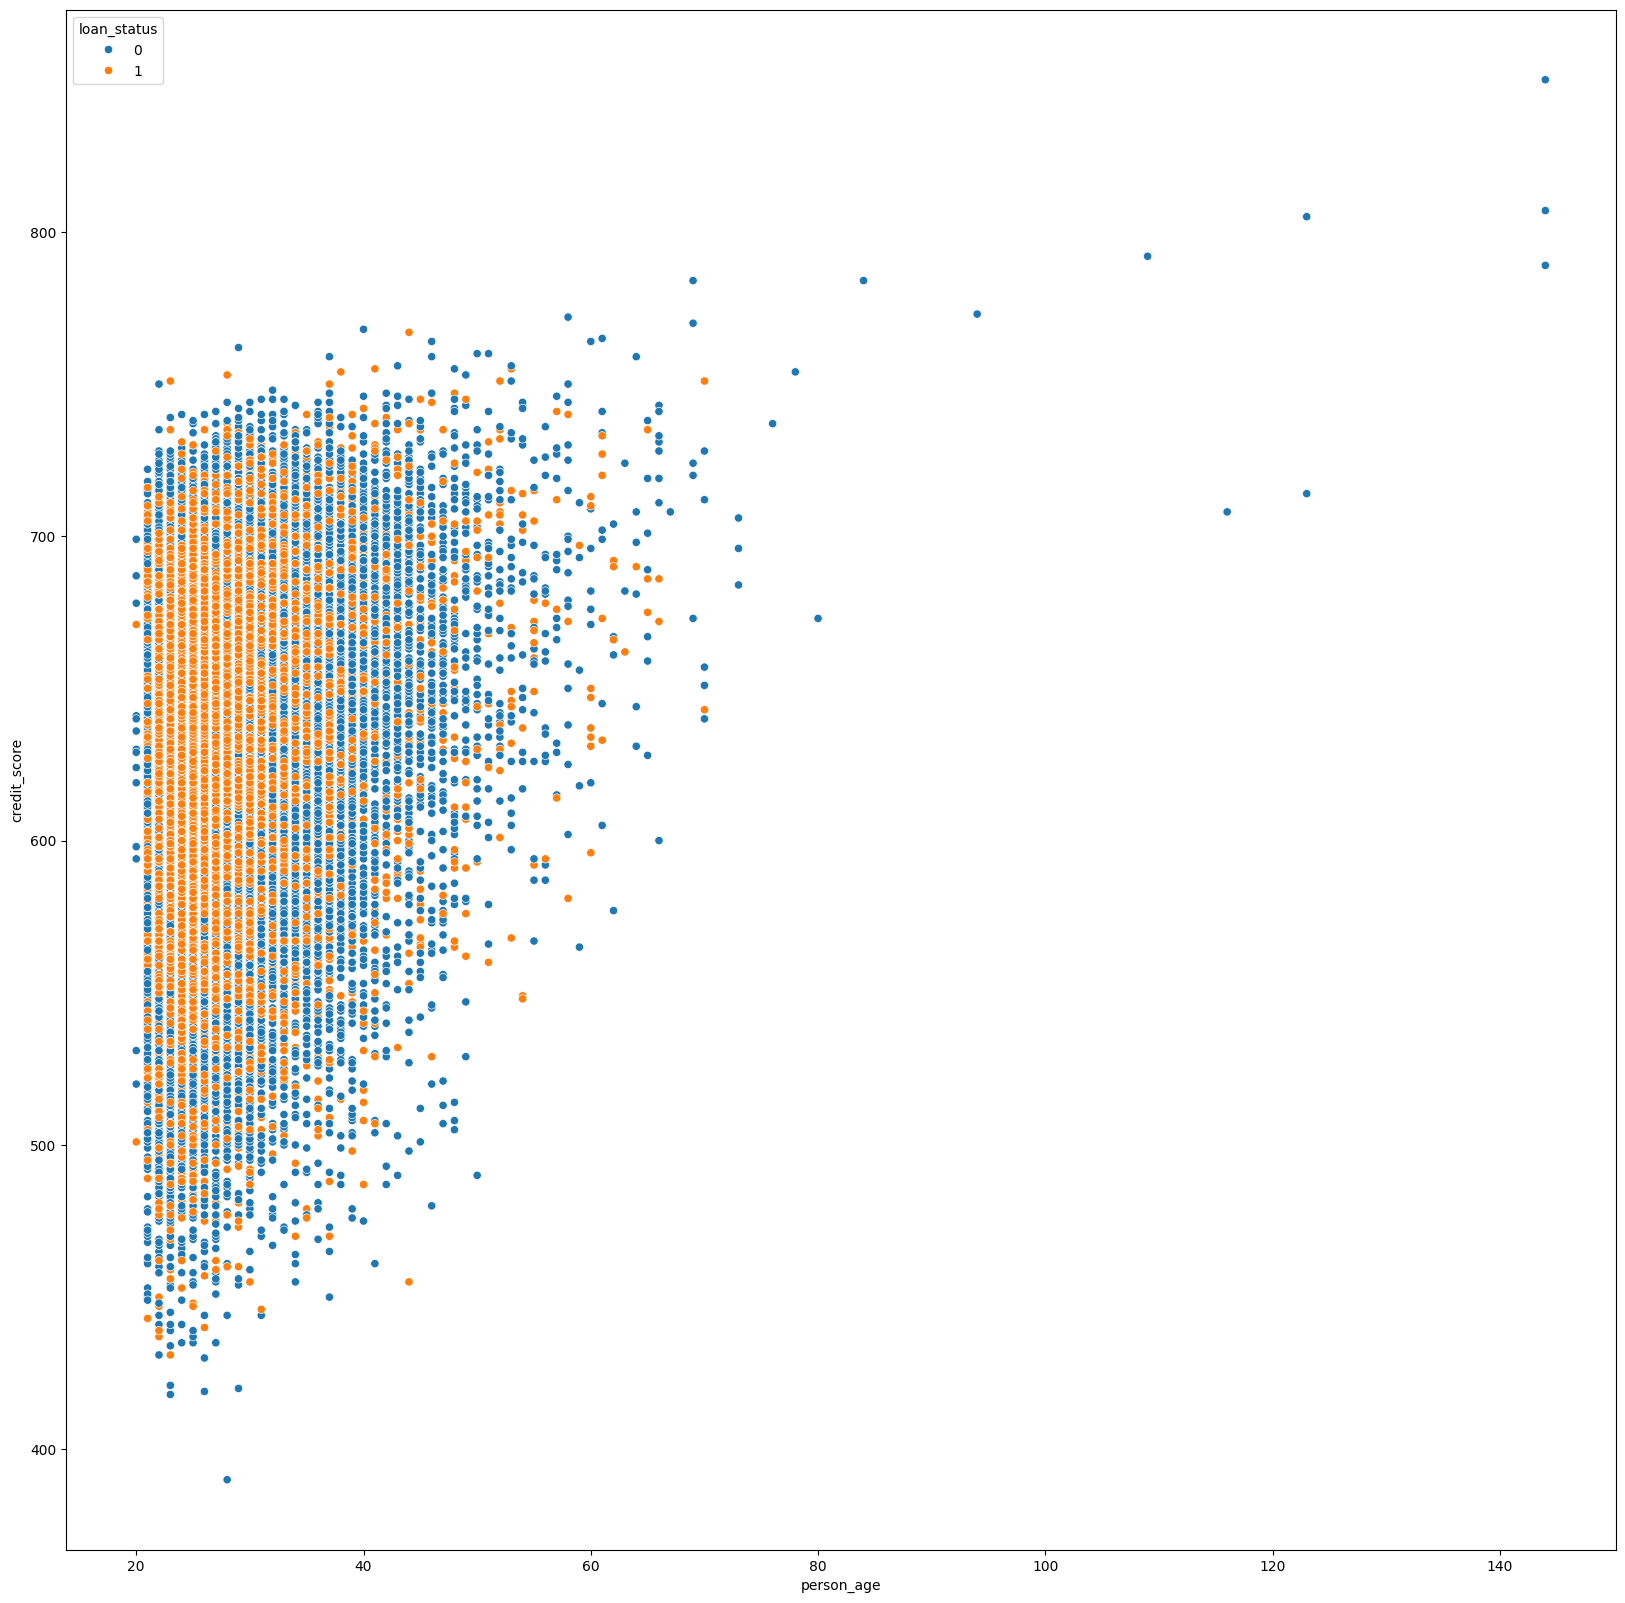

In [24]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='person_age', y='credit_score', data=df, hue='loan_status')
plt.show()

Loan is usually approved for whose that are lower then 30-35 y.o

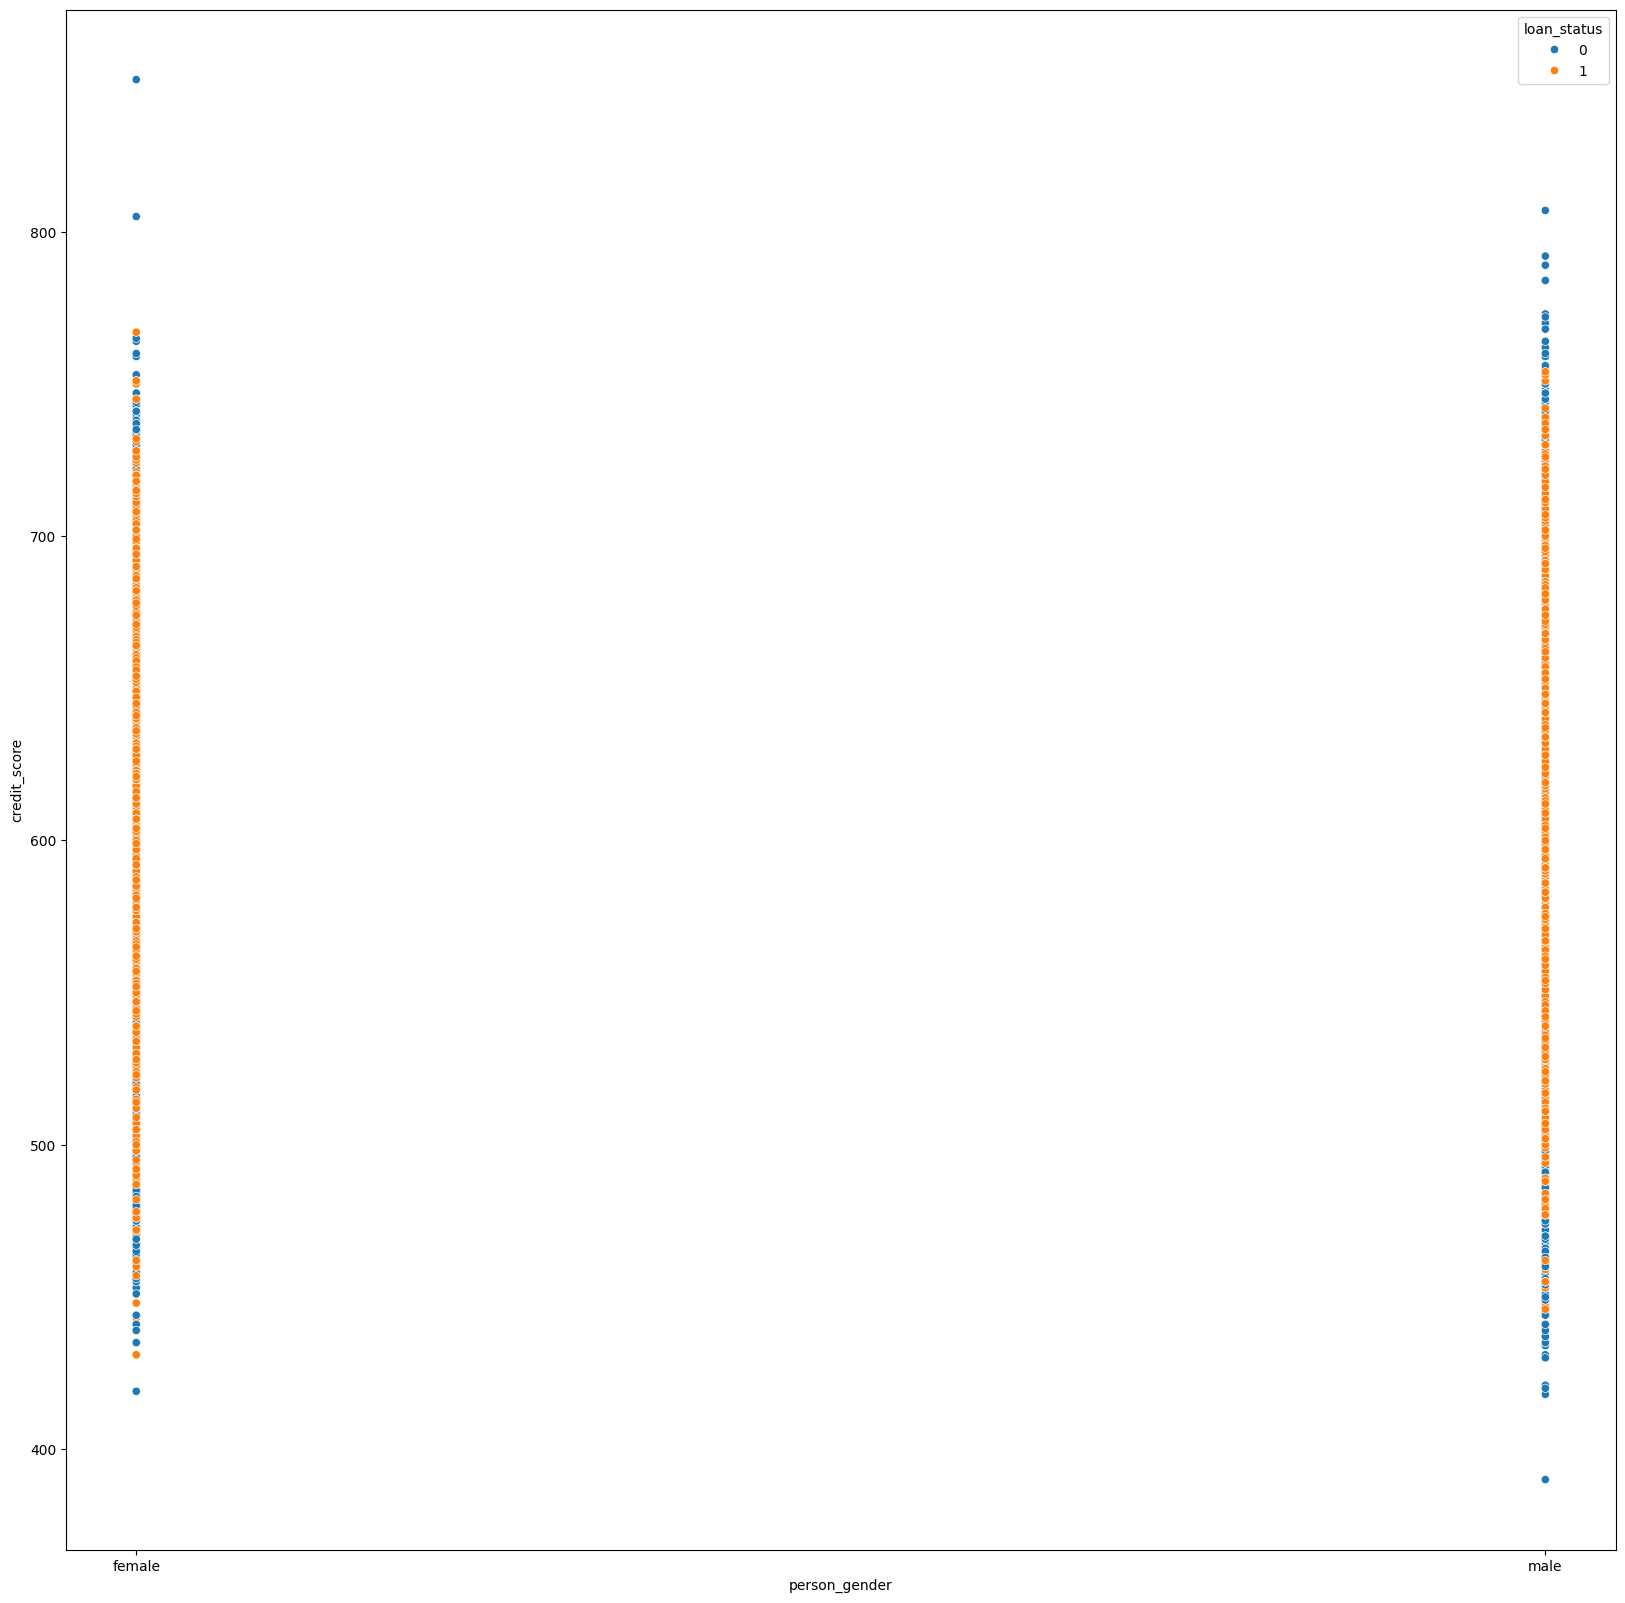

In [25]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='person_gender', y='credit_score', data=df, hue='loan_status')
plt.show()

 Almost no visible difference

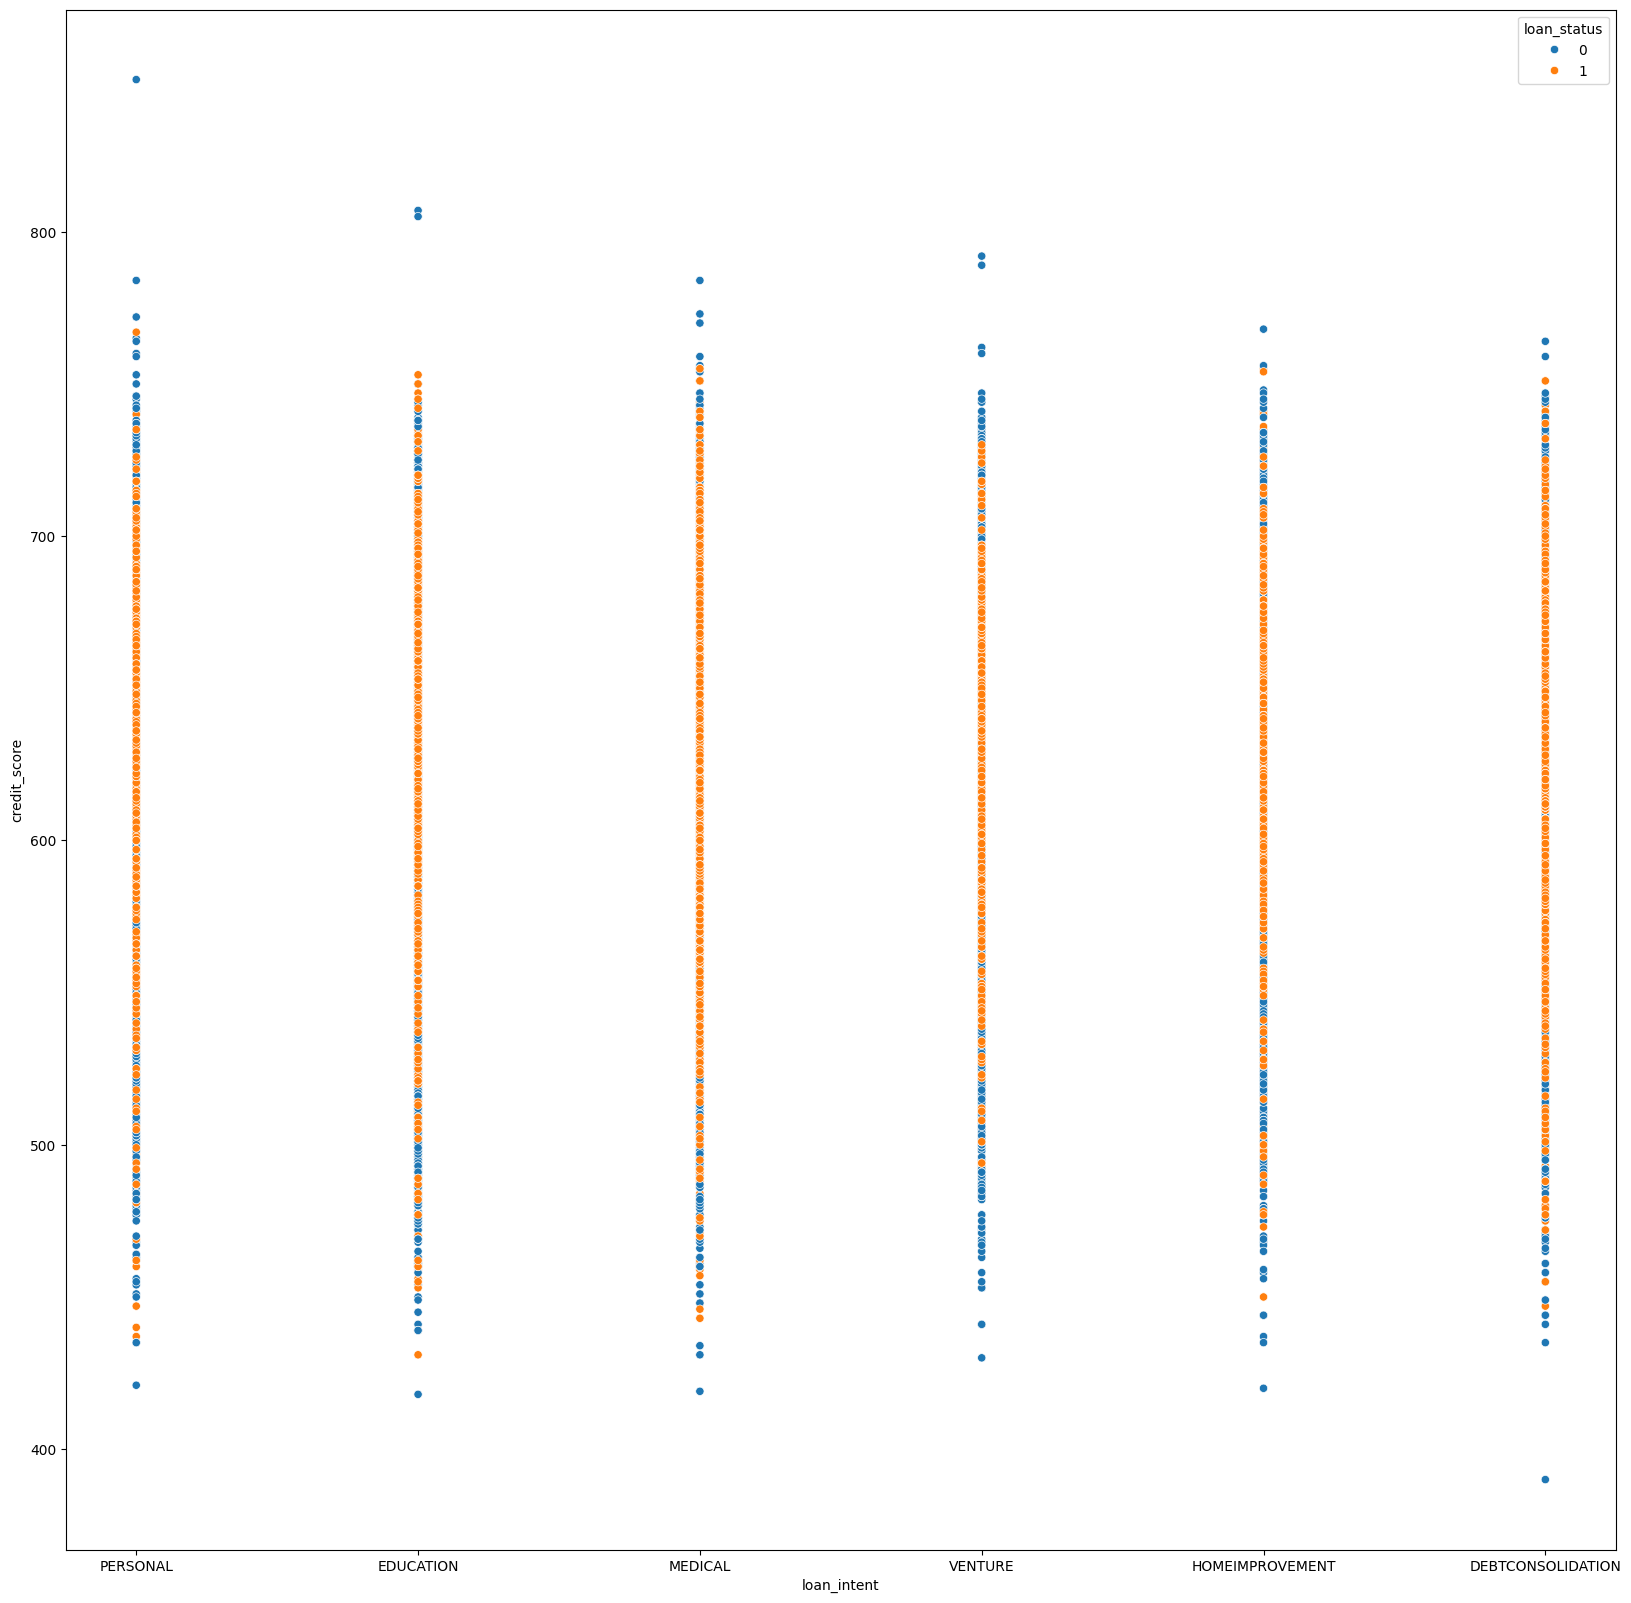

In [26]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='loan_intent', y='credit_score', data=df, hue='loan_status')
plt.show()

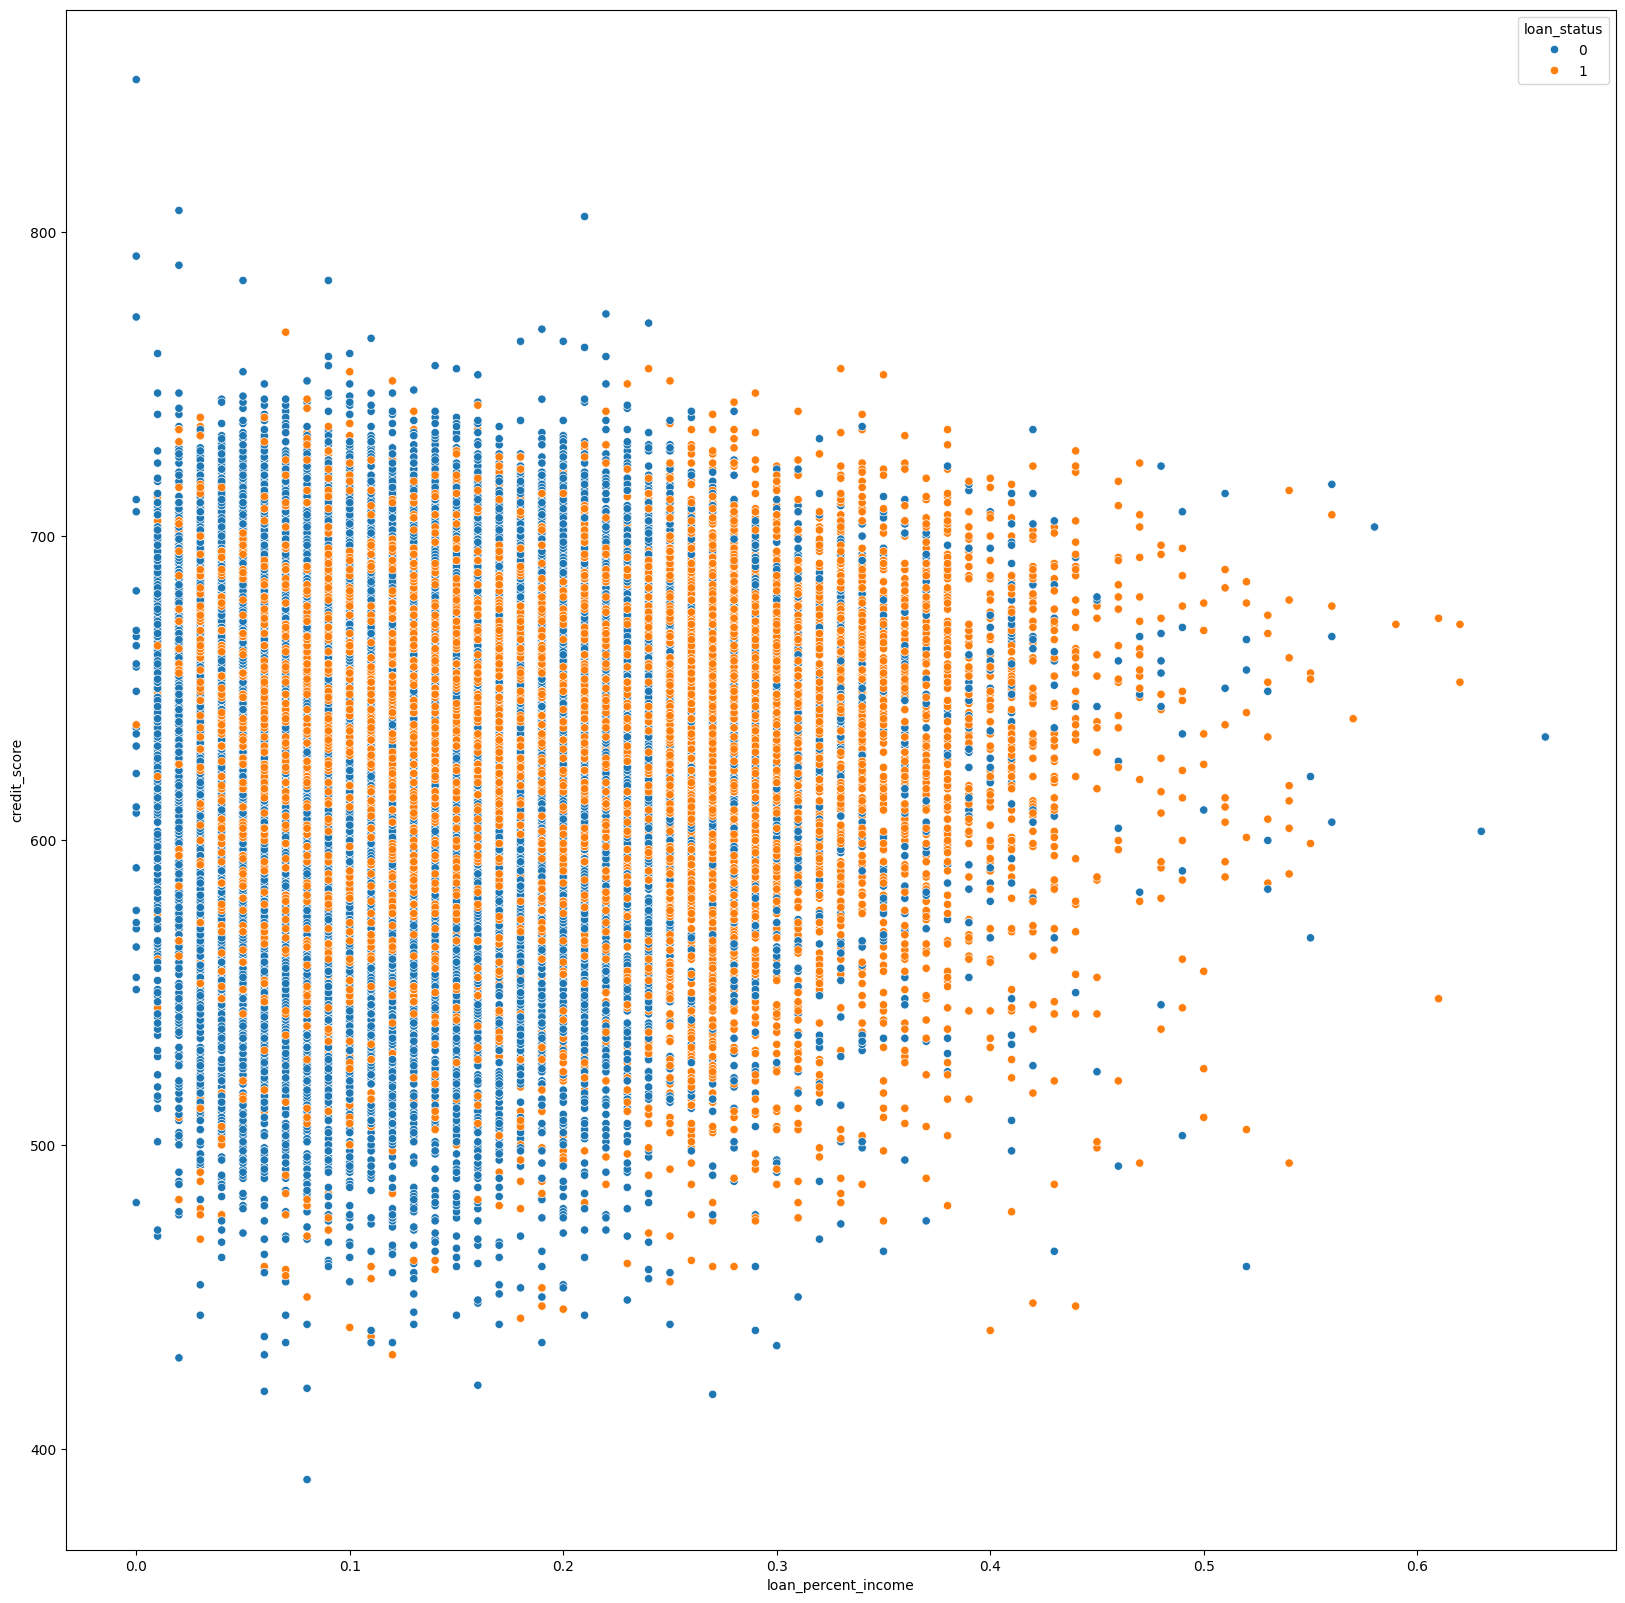

In [27]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='loan_percent_income', y='credit_score', data=df, hue='loan_status')
plt.show()

Obviously, the more %, the more approval rate

# Now, let's start classification

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [9]:
X = df_encoded.drop(['loan_status'], axis=1)
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
for i, j in zip(df_encoded.drop('loan_status', axis=1).columns, model.feature_importances_):
    print(f'{i}: {j}')

person_age: 0.021384914356522643
person_income: 0.13189334371624242
person_emp_exp: 0.01879107126161985
loan_amnt: 0.031090986488394434
loan_int_rate: 0.16754063628501634
loan_percent_income: 0.16198417777034754
cb_person_cred_hist_length: 0.017009326307391662
credit_score: 0.053741458535598696
person_gender_male: 0.005062053317260515
person_education_Bachelor: 0.004757287683043835
person_education_Doctorate: 0.0006046267850203617
person_education_High School: 0.004038792846617699
person_education_Master: 0.0040284127237797986
person_home_ownership_OTHER: 0.00045398553481584733
person_home_ownership_OWN: 0.010597363414602727
person_home_ownership_RENT: 0.035910012276487255
loan_intent_EDUCATION: 0.0067392829033615775
loan_intent_HOMEIMPROVEMENT: 0.008360805221913774
loan_intent_MEDICAL: 0.007073862108291569
loan_intent_PERSONAL: 0.007155883232218465
loan_intent_VENTURE: 0.008393292716441812
previous_loan_defaults_on_file_Yes: 0.2933884245150112


In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


# Accuracy is good, but out ultimate goal is to predict the people who will definately return a loan, which means that we have minimize false-positive error of giving loans. 
# Consequently, precision is our primary metric and I am going to focus on it 

In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6990
           1       0.77      0.78      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.86      0.85      9000
weighted avg       0.90      0.90      0.90      9000



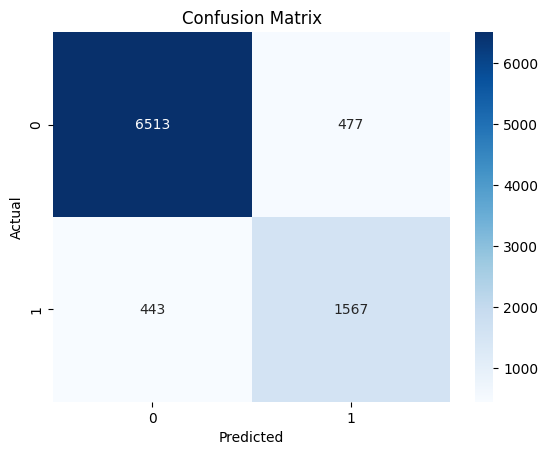

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### There is problem that false-positive rate is too high (477) and we need to minimize our risks there

The model clearly see to whom it must reject, but for acceptance it is very low

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import RandomizedSearchCV

In [37]:
param_grid = {'max_depth': [3, 5, 7]}
model_gs = GridSearchCV(RandomForestClassifier(),
    param_grid,
    scoring='precision'  # Оптимизируем под precision
)
model_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7]}, scoring='precision')

In [38]:
y_pred_GridSearch = model_gs.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_GridSearch))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6990
           1       0.98      0.35      0.52      2010

    accuracy                           0.85      9000
   macro avg       0.91      0.68      0.72      9000
weighted avg       0.87      0.85      0.83      9000



OK, now we see a good precision on accepted and good recall on rejected. This is actually what I wanted to do, but let's try to improve it further

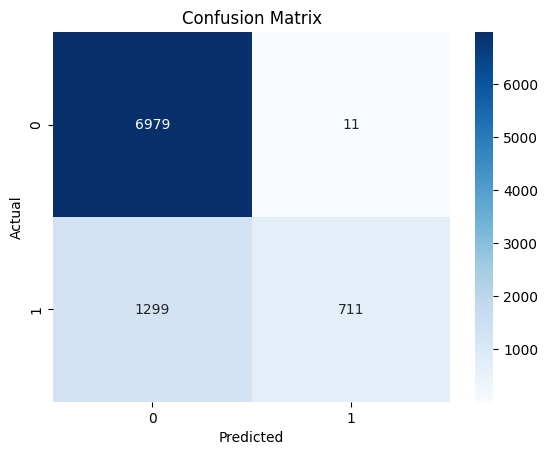

In [39]:
cm = confusion_matrix(y_test, y_pred_GridSearch)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now, i wll apply f-beta score

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [42]:
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=100, 
                                   scoring='precision',
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='precision', verbose=1)

In [43]:
y_pred_randomSearch = random_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_randomSearch))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6990
           1       0.91      0.72      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.92      0.85      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [57]:
df_encoded.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')

In [69]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,False,False,False,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,False,False,True,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,False,False,False,True,False,False,True,False,False,True,False,False,False


## I think it is the best one. Random forest turned out to be the best

### so I am going to create pipeline with it

In [18]:
#C:\Users\Alex\Desktop\Jupyter\loan approval\notebooks
import sys
sys.path.append("C:/Users/Alex/Desktop/Jupyter/loan approval/notebooks")  # Укажите полный путь к папке с pipe.py

from pipe import Imputer

In [19]:
from sklearn.compose import ColumnTransformer

In [20]:
pipe = ColumnTransformer([("person_emp_exp_imputer", Imputer(strategy="mode"), "person_emp_exp")],
                         remainder="passthrough")

In [21]:
x_final_train = pipe.fit_transform(X_train)
y_final_train = y_train

x_final_test = pipe.transform(X_test)
y_final_test = y_test

In [26]:
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(x_final_train, y_final_train)
y_pred_rf_final = rf_final.predict(x_final_test)

In [27]:
print(classification_report(y_final_test, y_pred_rf_final))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [28]:
import pickle
from pickle import dump

In [29]:
with open("../loan approval/models/v1/pipe.pcl", "wb") as fid:
    dump(pipe, fid)

In [30]:
pickle.dump(rf_final, open("../loan approval/models/v1/rf_model.pcl", 'wb')) 


Trying anything else

In [44]:
# Logistic regression
model_lr = LogisticRegression(class_weight={0: 1, 1: 5})
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      6990
           1       0.37      0.83      0.52      2010

    accuracy                           0.65      9000
   macro avg       0.65      0.72      0.62      9000
weighted avg       0.80      0.65      0.68      9000



G:\Python 3.11\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random forest also did a good job, but let's try boosting

In [45]:
from xgboost import XGBClassifier


In [46]:
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



G:\Python 3.11\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:25:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [47]:
from pickle import dump

In [51]:
import pickle

In [55]:
with open("../loan approval/models/v1/df_encoded.pcl", "wb") as fid:
    dump(df_encoded, fid)

In [54]:
pickle.dump(rf, open("../loan approval/models/v1/rf.pcl", 'wb')) 
#rf.save_model("../models/v1/rf.pcl")

#### I will apply grid search

PS: It's not the best

In [ ]:

param_grid = {
    'max_depth': [3, 5, 7],  # tree deep
    'learning_rate': [0.01, 0.05, 0.1],  # learning rate
    'n_estimators': [100, 200, 300],  # number of trees
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],  # regularization parametr
    'scale_pos_weight': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, 
                           scoring='f1_weighted', cv=2, verbose=1, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)


In [ ]:
best_xgb_model = grid_search.best_estimator_

y_pred_xgb_GS = best_xgb_model.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_GS))

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,False,False,False,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,False,False,True,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,False,False,False,True,False,False,True,False,False,True,False,False,False
